<a href="https://colab.research.google.com/github/Sujan-Sawant/Bank-Customer-Churn/blob/main/Bank_Customer_Churn_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Losing bank customers
• Every bank wants to hold their customers for sustaining their business and thus this Anonymous Multinational bank. You have customer data of account holders at Anonymous Multinational Bank with the aim of understanding
• exploring the correlation between variables such as credit score, age, tenure, balance, and geography with customer churn. Assess the impact of demographic factors like gender and the presence of credit cards on churn rates. • Additionally, analyze customer satisfaction scores and complaint resolutions to identify areas for service improvement. Utilize your analytics skills to find factors contributing to potential churn based. This project provides an opportunity to enhance customer retention strategies by uncovering patterns and insights within the dataset.

Losing bank customers

- Data description

- RowNumber—corresponds to the record (row) number and has no effect on the output.

- CustomerId—contains random values and has no effect on customer leaving the bank.

- Surname—the surname of a customer has no impact on their decision to leave the bank.

- CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

- Geography—a customer’s location can affect their decision to leave the bank.

- Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

- Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

- Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

- Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

- NumOfProducts—refers to the number of products that a customer has purchased through the bank.

- HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

- IsActiveMember—active customers are less likely to leave the bank.

- EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

- Exited—whether or not the customer left the bank.

- Complain—customer has complaint or not.

- Satisfaction Score—Score provided by the customer for their complaint resolution.

- Card Type—type of card hold by the customer.

- Points Earned—the points earned by the customer for using credit card.

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [107]:
!gdown 1W0xTBKT9PkayTJDpZdRcI9O23mKgcjI_

Downloading...
From: https://drive.google.com/uc?id=1W0xTBKT9PkayTJDpZdRcI9O23mKgcjI_
To: /content/Bank-Records.csv
100% 837k/837k [00:00<00:00, 57.4MB/s]


In [108]:
data = pd.read_csv("/content/Bank-Records.csv")

In [109]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [110]:
data.shape

(10000, 18)

In [111]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [113]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [114]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [115]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [116]:
data["CustomerId"].nunique()

10000

## Performing Basic Exploring data analysis


In [117]:
data["Exited"].value_counts()

,count
Exited,
0,7962
1,2038


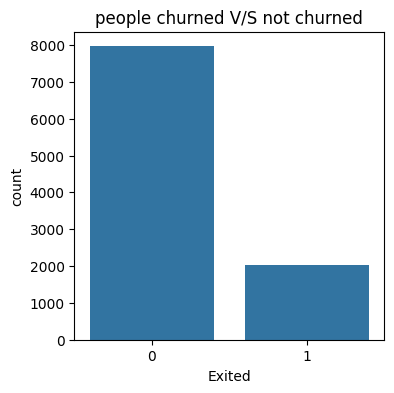

In [118]:
plt.figure(figsize = (4,4))
sns.countplot(x = data["Exited"])
plt.title("people churned V/S not churned")
plt.show()

from above observation it is clear that 2038 people exited from bank and 7962 are still account holder at the bank out of 10000



In [119]:
data["Complain"].value_counts()

,count
Complain,
0,7956
1,2044


In [120]:
pd.crosstab(columns = data["Exited"], index = data["Complain"])

Exited,0,1
Complain,,
0,7952,4
1,10,2034


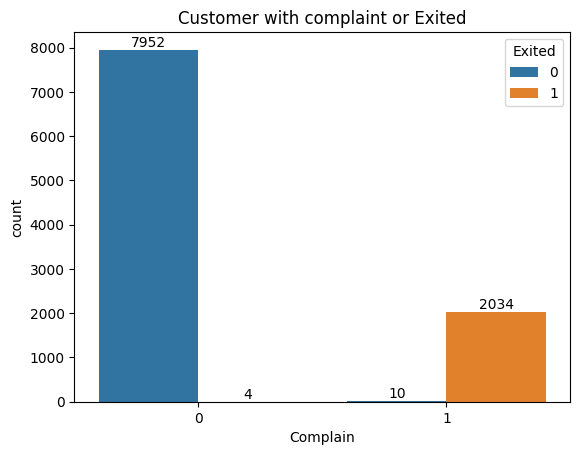

In [121]:
ax1 = sns.countplot(x=data["Complain"],hue=data["Exited"])
for container in ax1.containers:
  ax1.bar_label(container)
plt.title("Customer with complaint or Exited")
plt.show()

According to the bar graph above, it indicates that out of the 2038 customers who churned, 2034 had registered complaints.

In [122]:
data["Satisfaction Score"].value_counts()

,count
Satisfaction Score,
3,2042
2,2014
4,2008
5,2004
1,1932


In [123]:
pd.crosstab(columns= data["Satisfaction Score"] , index = data["Complain"])

Satisfaction Score,1,2,3,4,5
Complain,,,,,
0,1545,1576,1636,1595,1604
1,387,438,406,413,400


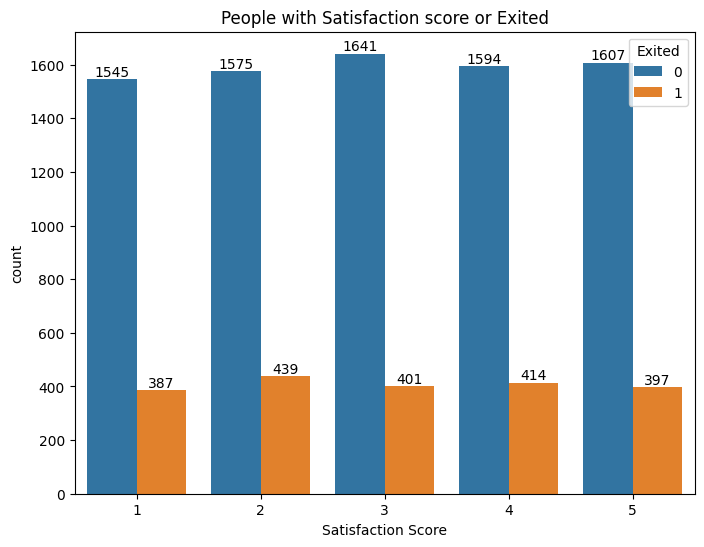

In [124]:
plt.figure(figsize = (8,6))
ax2 = sns.countplot(x = data["Satisfaction Score"] , hue = data["Exited"])
for container in ax2.containers:
  ax2.bar_label(container)
plt.title("People with Satisfaction score or Exited")
plt.show()

Based on the above observation, individuals with lower satisfaction scores has higher tendency to exit

In [125]:
pd.crosstab(columns = data["Exited"], index = data["HasCrCard"])

Exited,0,1
HasCrCard,,
0,2332,613
1,5630,1425


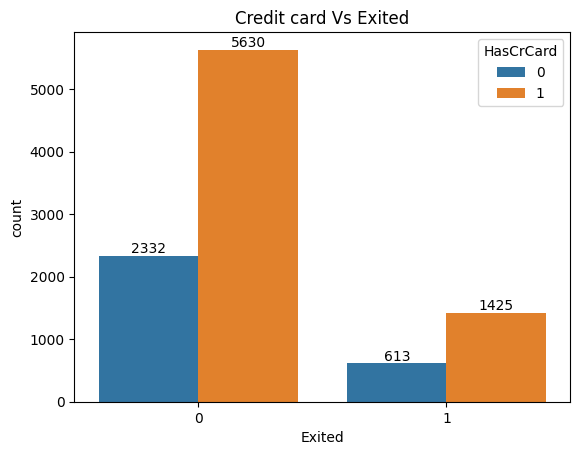

In [126]:
ax3 = sns.countplot(x = data["Exited"], hue = data["HasCrCard"])
for container in ax3.containers:
  ax3.bar_label(container)
plt.title("Credit card Vs Exited")
plt.show()

Based on the above observation, it is evident that 613 individuals exited with no credit card, whereas 1425 exited with a card, indicating a higher exit rate among cardholders compared to those without cards.

In [127]:
data["Card Type"].value_counts()

,count
Card Type,
DIAMOND,2507
GOLD,2502
SILVER,2496
PLATINUM,2495


In [128]:
pd.crosstab(columns = data["Card Type"], index = data["Exited"])

Card Type,DIAMOND,GOLD,PLATINUM,SILVER
Exited,,,,
0,1961,2020,1987,1994
1,546,482,508,502


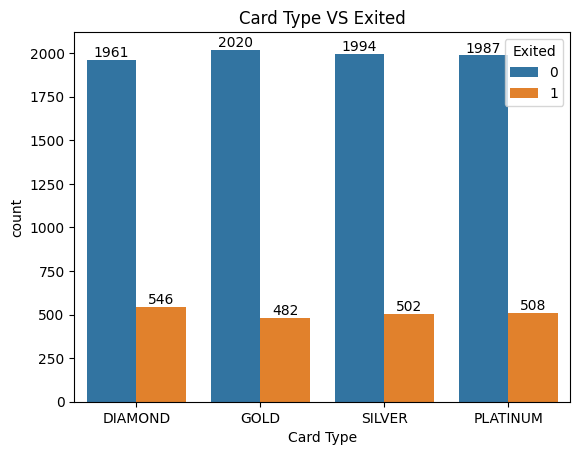

In [129]:
ax4 = sns.countplot(x = data["Card Type"], hue = data["Exited"])
for container in ax4.containers:
  ax4.bar_label(container)
plt.title("Card Type VS Exited")
plt.show()

The graph above indicates that individuals holding diamond and platinum cards have discontinued their operations with the bank.

In [130]:
data[data["Exited"]==1]["CreditScore"].max()

850

In [131]:
data[data["Exited"]==1]["CreditScore"].min()

350

In [132]:
bins = [300,400,500,600,700,800,900]

In [133]:
credit_bins = pd.cut(data[data["Exited"]==1]["CreditScore"], bins)

In [134]:
pd.crosstab(columns = credit_bins , index = data["Exited"])

CreditScore,"(300, 400]","(400, 500]","(500, 600]","(600, 700]","(700, 800]","(800, 900]"
Exited,,,,,,
1,19,133,513,753,493,127


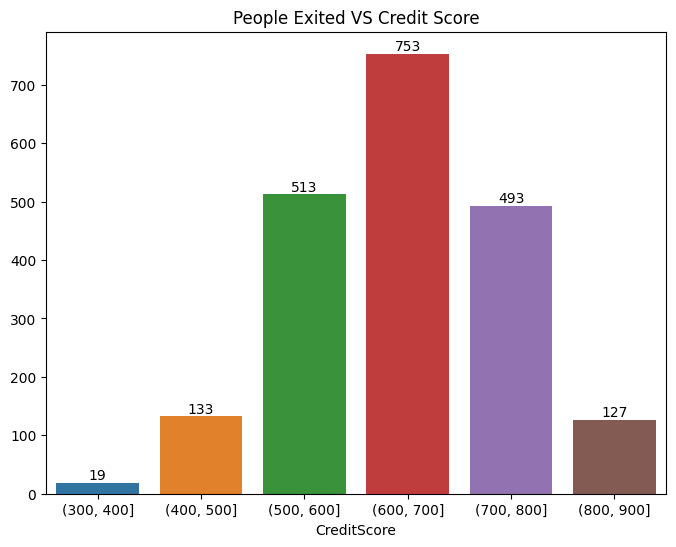

In [135]:
plt.figure(figsize = (8,6))
ax5 = sns.barplot(pd.crosstab(columns = credit_bins , index = data["Exited"]))
for val in ax5.containers:
  ax5.bar_label(val)
plt.title("People Exited VS Credit Score")
plt.show()


The above graph indicates that The individuals whose credit scores has within the ranges of 500-600 and 600-700 were the most likely to discontinued the bank's services.

In [136]:
pd.crosstab(columns = data["Gender"],index = data["Exited"])

Gender,Female,Male
Exited,,
0,3404,4558
1,1139,899


In [137]:
pd.crosstab(columns = data["Geography"], index = data["Exited"])

Geography,France,Germany,Spain
Exited,,,
0,4203,1695,2064
1,811,814,413


In [138]:
data[data["Exited"]==1]["Geography"].value_counts()

,count
Geography,
Germany,814
France,811
Spain,413


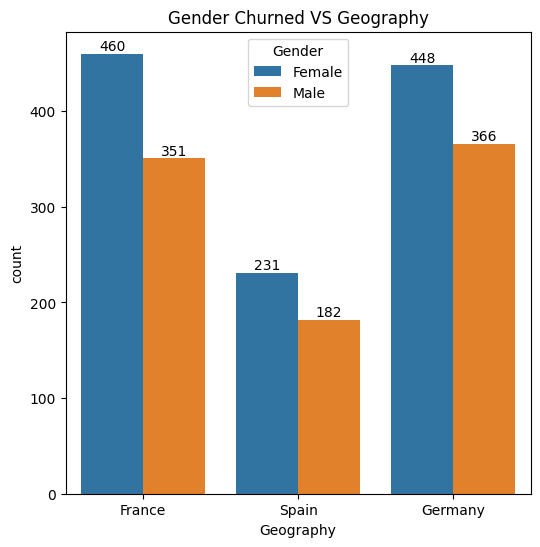

In [139]:
plt.figure(figsize = (6,6))
ax6 = sns.countplot(x = data[data["Exited"] == 1]["Geography"], hue = data["Gender"])
for val in ax6.containers:
  ax6.bar_label(val)
plt.title("Gender Churned VS Geography")
plt.show()

The graph above shows the geographical distribution of individuals who have churned, categorized by gender.

In [140]:
pd.crosstab(columns = [data["Gender"], data["HasCrCard"]], index = data["Exited"] )

Gender    Female        Male      
HasCrCard      0     1     0     1
Exited                            
0           1007  2397  1325  3233
1            344   795   269   630

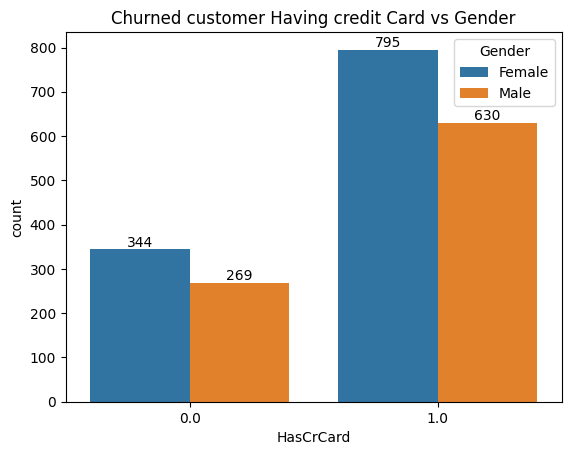

In [141]:
ax7 = sns.countplot(x = data[data["Exited"]==1]["HasCrCard"], hue = data["Gender"])
for val in ax7.containers:
  ax7.bar_label(val)
plt.title("Churned customer Having credit Card vs Gender")
plt.show()

The graph above displays the distribution of churned individuals based on whether they have a credit card or not, categorized by gender.

In [142]:
data["Balance"]

,Balance
0,0.00
1,83807.86
2,159660.80
3,0.00
4,125510.82
...,...
9995,0.00
9996,57369.61
9997,0.00
9998,75075.31


In [143]:
data[data["Exited"]==1]["Balance"]

,Balance
0,0.00
2,159660.80
5,113755.78
7,115046.74
16,132602.88
...,...
9981,152039.70
9982,137145.12
9991,88381.21
9997,0.00


In [144]:
data[(data["Balance"] != 0) & (data["Exited"] == 1)]["CustomerId"]


,CustomerId
2,15619304
5,15574012
7,15656148
16,15737452
35,15794171
...,...
9978,15703563
9981,15672754
9982,15768163
9991,15769959


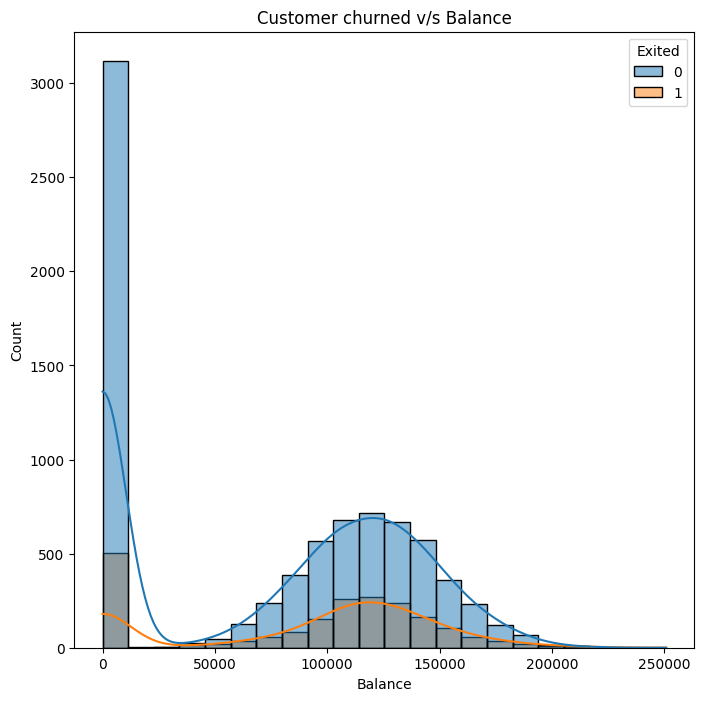

In [145]:
plt.figure(figsize = (8,8))
sns.histplot (data = data, x = data["Balance"], hue = data["Exited"], kde= True)
plt.title("Customer churned v/s Balance")
plt.show()

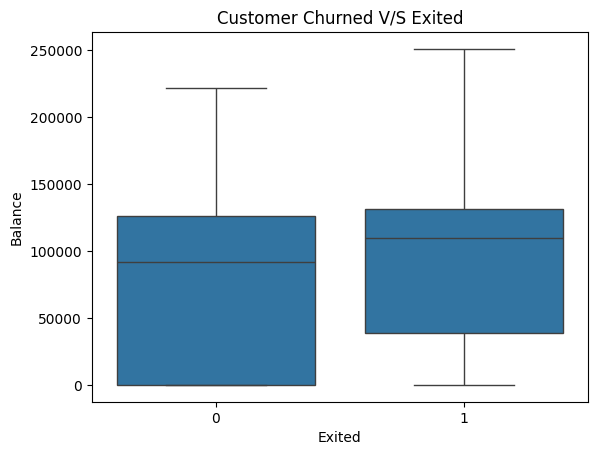

In [146]:
sns.boxplot(data=data,x=data["Exited"],y = data["Balance"])
plt.title("Customer Churned V/S Exited")
plt.show()

In [147]:
pd.crosstab(columns = data["Tenure"], index = data["Exited"])

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,770,389
1,95,232,201,213,203,209,196,177,197,214,101


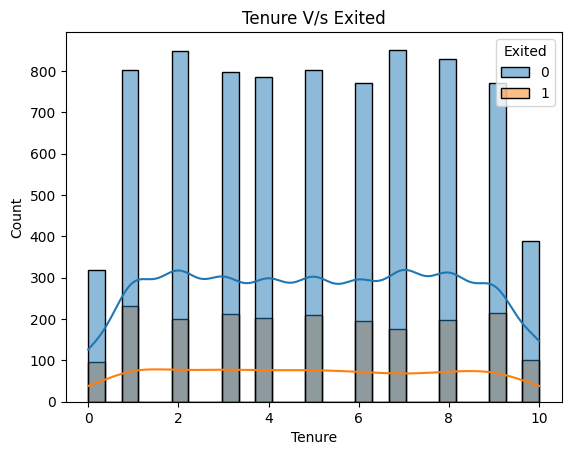

In [148]:
sns.histplot(x = data["Tenure"], hue = data["Exited"], kde = True)
plt.title("Tenure V/s Exited")
plt.show()

In [149]:
data[data['Exited']==1]['Tenure'].value_counts().reset_index()


,Tenure,count
0,1,232
1,9,214
2,3,213
3,5,209
4,4,203
5,2,201
6,8,197
7,6,196
8,7,177
9,10,101


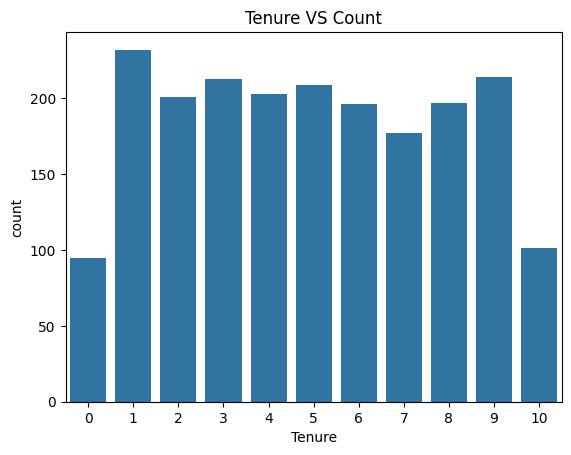

In [150]:
sns.countplot(x =data[data['Exited']==1]['Tenure'])
plt.title("Tenure VS Count")
plt.show()

## Lets check Estimated salary v/s balance of people w.r.t to Geography for different genders who left the bank

## Male

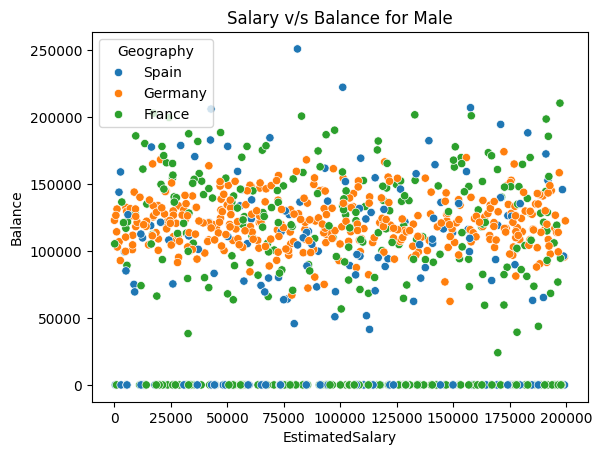

In [151]:
sns.scatterplot( x = "EstimatedSalary",y = "Balance", hue = "Geography",
                data = data[(data["Exited"]== 1) & (data["Gender"]== "Male")])
plt.title("Salary v/s Balance for Male")
plt.show()

## Female

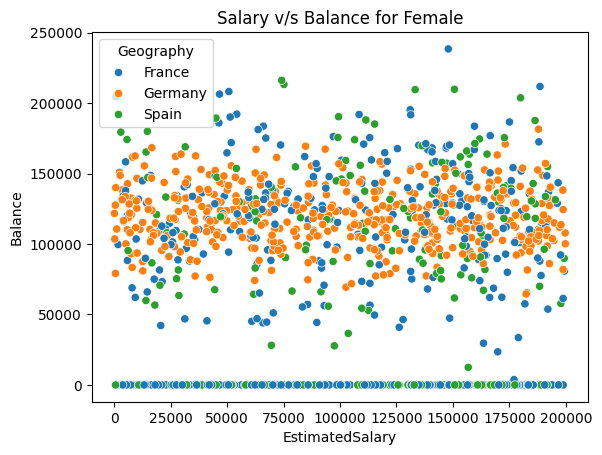

In [152]:
sns.scatterplot( x = "EstimatedSalary",y = "Balance", hue = "Geography",
                data = data[(data["Exited"]== 1) & (data["Gender"]== "Female")])
plt.title("Salary v/s Balance for Female")
plt.show()

##<font color = "Red"> lets create functions for our Hypothesis test inorder to check correlations


##<font color= "Yellow">**Credit score vs Customer churn**

we will use ANOVA for our hypothesis testing

In [153]:
d1 = data [['CreditScore','Exited']]
d1

,CreditScore,Exited
0,619,1
1,608,0
2,502,1
3,699,0
4,850,0
...,...,...
9995,771,0
9996,516,0
9997,709,1
9998,772,1


<font color="green">**Ho: Customer churn is independent of Credit score**

<font color="green">**Ha: customer churn is dependent on Credit score**

In [154]:
from scipy.stats import f_oneway,kruskal,ttest_ind,chi2_contingency

t_stats, p_value = ttest_ind(data[data['Exited'] == 0]['CreditScore'],data[data['Exited'] == 1]['CreditScore'])
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value < 0.05:
  print("Null hypothesis is rejected")
  print("Conclusion: Evidence suggests customer churn is dependent on credit score.")
else:
  print("Null hypothesis is accepted")
  print("Conclusion: Evidence does not support that customer churn is dependent on credit score; they appear to be independent.")


t_stats : 2.6778368664704235
p_value 0.0074220372427342435
Null hypothesis is rejected
Conclusion: Evidence suggests customer churn is dependent on credit score.


##<font color="Yellow">**Age vs Customer churn**

we will use ttest_ind

In [155]:
data[['Age','Exited']]


,Age,Exited
0,42,1
1,41,0
2,42,1
3,39,0
4,43,0
...,...,...
9995,39,0
9996,35,0
9997,36,1
9998,42,1


<font color= "green">**H0: Customer churn is independent of Age**

<font color= "green">**Ha: Customer churn is dependent of Age**

In [156]:
t_stats, p_value = ttest_ind(data[data['Exited'] == 0]['Age'],data[data['Exited'] == 1]['Age'])
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value < 0.05:
  print("Null hypothesis is rejected")
  print("Conclusion: There is significant evidence to suggest that customer churn is dependent on age.\nThis could imply that different age groups have varying churn rates, which might inform targeted marketing strategies or customer retention efforts.")
else:
  print("Null hypothesis is accepted")
  print("Conclusion: There is not enough evidence to suggest that customer churn is dependent on age.\nThis indicates that age does not appear to be a significant factor influencing whether customers churn.")

t_stats : -29.76379695489027
p_value 1.3467162476197306e-186
Null hypothesis is rejected
Conclusion: There is significant evidence to suggest that customer churn is dependent on age.
This could imply that different age groups have varying churn rates, which might inform targeted marketing strategies or customer retention efforts.


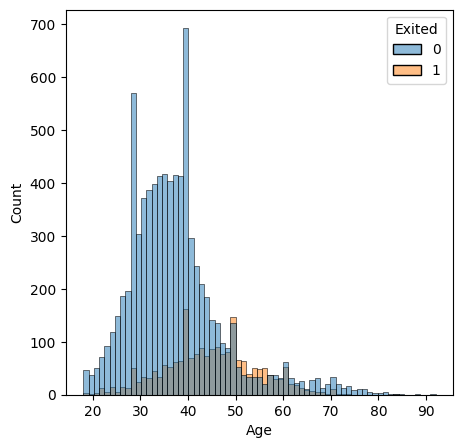

In [157]:
plt.figure(figsize=(5, 5))
sns.histplot(data=data, x="Age", hue="Exited")
plt.show()

##<font color="Yellow">**Tenure V/s Customer churn**


In [158]:
data[['Tenure','Exited']]

,Tenure,Exited
0,2,1
1,1,0
2,8,1
3,1,0
4,2,0
...,...,...
9995,5,0
9996,10,0
9997,7,1
9998,3,1


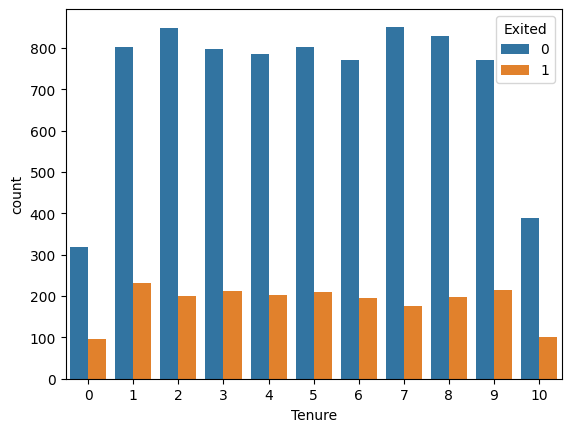

In [159]:
sns.countplot(x = data['Tenure'],hue = data['Exited'])
plt.show()

<font color= "green">**H0: Customer churn is independent of tenure**

<font color= "green">**Ha: Customer churn is dependent of tenure**

In [160]:
t_stats, p_value = ttest_ind(data[data['Exited'] == 0]['Tenure'],data[data['Exited'] == 1]['Tenure'])
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value < 0.05:
  print("Null hypothesis is rejected")
  print("Conclusion: There is sufficient evidence to suggest that customer churn is dependent on tenure.\nThis implies that the length of time a customer has been with the company (tenure) is associated with their likelihood of churning.\nFor example, you might find that customers with shorter tenure are more likely to churn compared to those with longer tenure.\nThis insight could inform strategies for customer retention,\nsuch as targeted interventions for new customers.")
else:
  print("Null hypothesis is accepted")
  print()
  print("Conclusion: There is not enough evidence to suggest that customer churn is dependent on tenure.\nThis means that, based on your analysis, tenure does not appear to be a significant factor influencing customer churn rates.\nIt suggests that the likelihood of a customer churning is relatively uniform across different tenure groups,\nwhich could prompt a reassessment of retention strategies that focus on tenure.")

t_stats : 1.365570678788837
p_value 0.1721044754880606
Null hypothesis is accepted

Conclusion: There is not enough evidence to suggest that customer churn is dependent on tenure.
This means that, based on your analysis, tenure does not appear to be a significant factor influencing customer churn rates.
It suggests that the likelihood of a customer churning is relatively uniform across different tenure groups,
which could prompt a reassessment of retention strategies that focus on tenure.


##<font color="Yellow">Balance vs Customer Churn

In [161]:
print(" max Balance of person who churned ", data[data['Exited'] == 1]['Balance'].max())
print(" min Balance of person who churned ",data[data['Exited'] == 1]['Balance'].min())
print(" max Balance of person who didn't churned ", data[data['Exited'] == 0]['Balance'].max())
print(" min Balance of person who  didn't churned ",data[data['Exited'] == 0]['Balance'].min())

 max Balance of person who churned  250898.09
 min Balance of person who churned  0.0
 max Balance of person who didn't churned  221532.8
 min Balance of person who  didn't churned  0.0


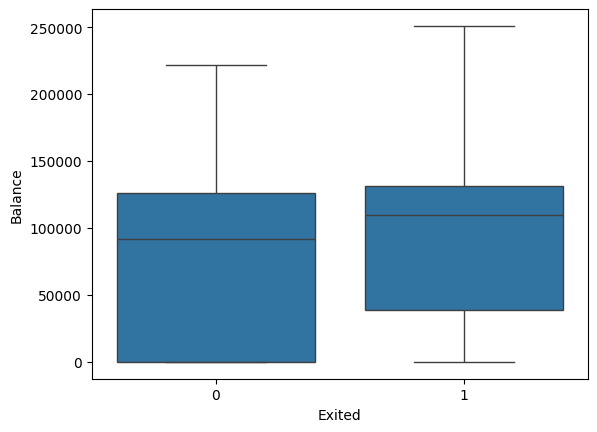

In [162]:
sns.boxplot(y = data['Balance'], x= data['Exited'])
plt.show()

from graphical observation it is Difficult to conclude about correlation of customer churn and their balance in account

<font color= "green">**Ho: Customer Churn is independent of Balance**

<font color= "green">**Ha: Customer Churn is dependent of Balance**

In [163]:
t_stats, p_value = ttest_ind(data[data['Exited'] == 0]['Balance'],data[data['Exited'] == 1]['Balance'])
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value < 0.05:
  print("Null hypothesis is rejected")
  print()
  print("Conclusion: There is sufficient evidence to suggest that customer churn is dependent on balance.\nThis means that the amount of balance a customer holds is associated with their likelihood of churning.\nFor example, you might find that customers with low balances are more likely to churn compared to those with higher balances.\nThis insight could lead to targeted retention strategies aimed at customers with low balances,\nperhaps by offering incentives or personalized support.")
else:
  print("Null hypothesis is accepted")
  print("Conclusion: There is not enough evidence to suggest that customer churn is dependent on balance.\nThis indicates that balance does not appear to be a significant factor influencing customer churn rates.\nIn other words, the likelihood of a customer churning is relatively similar across different balance levels.\nThis might suggest that factors other than balance are more critical in determining customer retention.")

t_stats : -11.940747722508185
p_value 1.2092076077156017e-32
Null hypothesis is rejected

Conclusion: There is sufficient evidence to suggest that customer churn is dependent on balance.
This means that the amount of balance a customer holds is associated with their likelihood of churning.
For example, you might find that customers with low balances are more likely to churn compared to those with higher balances.
This insight could lead to targeted retention strategies aimed at customers with low balances,
perhaps by offering incentives or personalized support.


##<font color="Yellow">**Geogrpahy v/s customer churn**

In [164]:
GC = pd.crosstab(columns = data['Geography'],index = data['Exited'])
GC

Geography,France,Germany,Spain
Exited,,,
0,4203,1695,2064
1,811,814,413


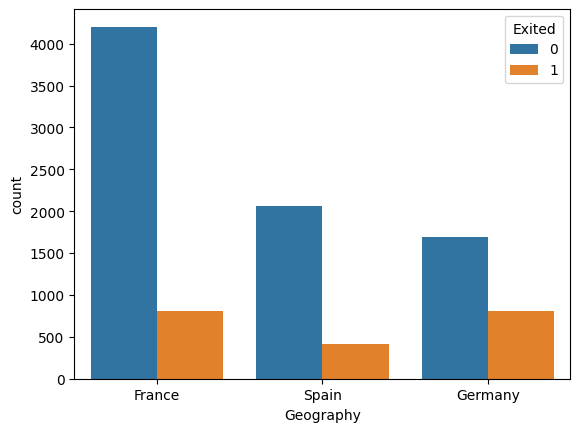

In [165]:
sns.countplot(x=data['Geography'],hue=data['Exited'])
plt.show()

Since this is a case of categorical - categorical we would apply chi2_contingency or Chi_square test of independence

<font color= "green">**H0: Geography and Customer churn are independent**

<font color= "green">**Ha : Geography and Customer churn are dependent**

In [166]:
t_stats, p_value, dof, array = chi2_contingency (GC)
print("Result:",chi2_contingency (GC))
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value < 0.05:
  print("Null hypothesis is rejected")
  print("Geography and Customer churn are dependent\n")
  print("Conclusion: There is sufficient evidence to suggest that geography and customer churn are dependent.\nThis implies that the geographic location of customers is associated with their likelihood of churning.\nFor instance, you might find that certain regions have higher churn rates than others, indicating that geographic factors\n(such as market conditions or local competition) may influence customer retention.\nThis insight could lead to more targeted marketing and retention strategies based on geographic segments.")

else:
  print("Null hypothesis is accepted")
  print("Geography and Customer churn are Independent")
  print("Conclusion: There is not enough evidence to suggest that geography and customer churn are dependent.\nThis indicates that customer churn rates do not significantly vary across different geographic locations.\nIn this case, it may imply that factors other than geography are more critical in influencing customer retention,\nsuggesting that geographic location may not be a priority in your churn reduction strategies.")

Result: Chi2ContingencyResult(statistic=300.6264011211942, pvalue=5.245736109572763e-66, dof=2, expected_freq=array([[3992.1468, 1997.6658, 1972.1874],
       [1021.8532,  511.3342,  504.8126]]))
t_stats : 300.6264011211942
p_value 5.245736109572763e-66
Null hypothesis is rejected
Geography and Customer churn are dependent

Conclusion: There is sufficient evidence to suggest that geography and customer churn are dependent.
This implies that the geographic location of customers is associated with their likelihood of churning.
For instance, you might find that certain regions have higher churn rates than others, indicating that geographic factors
(such as market conditions or local competition) may influence customer retention.
This insight could lead to more targeted marketing and retention strategies based on geographic segments.


##<font color="Yellow">**Gender and Customer Churn**

In [167]:
Gec = pd.crosstab(columns = data['Gender'],index = data['Exited'])
Gec


Gender,Female,Male
Exited,,
0,3404,4558
1,1139,899


<Axes: xlabel='Gender', ylabel='count'>

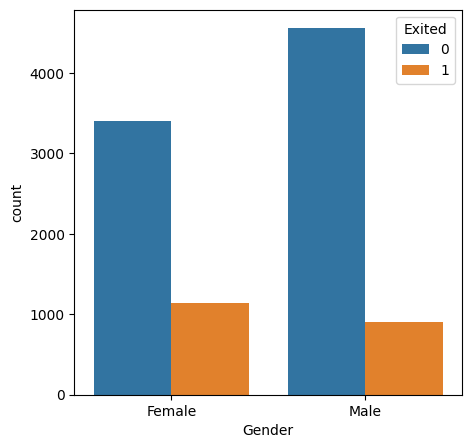

In [168]:
plt.figure(figsize=(5,5))
sns.countplot(x=data['Gender'],hue=data['Exited'])

<font color= "green">**H0: Gender and Customer churn are independent**

<font color= "green">**Ha : Gender and Customer churn are dependent**

In [169]:
t_stats, p_value, dof, array = chi2_contingency (Gec)
print("Result:",chi2_contingency (Gec))
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value < 0.05:
  print("Null hypothesis is rejected")
  print("Gender and Customer churn are dependent\n")
  print("Conclusion: There is sufficient evidence to suggest that gender and customer churn are dependent.\nThis implies that the likelihood of a customer churning varies by gender.\nFor example, you might find that one gender has a significantly higher churn rate than the other.\nThis information could be crucial for tailoring retention strategies, marketing campaigns,\nor product offerings that consider gender-based preferences or behaviors.")

else:
  print("Null hypothesis is accepted")
  print("Gender and Customer churn are Independent")
  print("Conclusion: There is not enough evidence to suggest that gender and customer churn are dependent.\nThis indicates that churn rates do not significantly differ between genders.\nIn this case, gender does not appear to be a critical factor influencing customer retention,\nsuggesting that other factors may be more relevant in addressing churn.")

Result: Chi2ContingencyResult(statistic=112.39655374778587, pvalue=2.9253677618642e-26, dof=1, expected_freq=array([[3617.1366, 4344.8634],
       [ 925.8634, 1112.1366]]))
t_stats : 112.39655374778587
p_value 2.9253677618642e-26
Null hypothesis is rejected
Gender and Customer churn are dependent

Conclusion: There is sufficient evidence to suggest that gender and customer churn are dependent.
This implies that the likelihood of a customer churning varies by gender.
For example, you might find that one gender has a significantly higher churn rate than the other.
This information could be crucial for tailoring retention strategies, marketing campaigns,
or product offerings that consider gender-based preferences or behaviors.


##<font color="Yellow">**Impact of Credit Card on Churn rate**

In [170]:
Cc = pd.crosstab(columns = data['Card Type'],index = data['Exited'])
Cc

Card Type,DIAMOND,GOLD,PLATINUM,SILVER
Exited,,,,
0,1961,2020,1987,1994
1,546,482,508,502


<font color= "green">**H0: Credit Card and Customer churn are independent**

<font color= "green">**Ha : Credit Card and Customer churn are dependent**

In [171]:
t_stats, p_value, dof, array = chi2_contingency (Gec)
print("Result:",chi2_contingency (Gec))
print("t_stats :",t_stats)
print("p_value",p_value)
if p_value < 0.05:
  print("Null hypothesis is rejected")
  print("Credit Card and Customer churn are dependent\n")
  print("Conclusion: There is sufficient evidence to suggest that credit card usage and customer churn are dependent.\nThis means that whether a customer uses a credit card is associated with their likelihood of churning.\nFor example, you might find that customers who do not use credit cards have a higher churn rate compared to those who do.\nThis insight could inform targeted retention strategies or marketing efforts that focus on credit card users or aim to convert non-users.")

else:
  print("Null hypothesis is accepted")
  print("Credit Card and Customer churn are Independent")
  print("Conclusion: There is not enough evidence to suggest that credit card usage and customer churn are dependent.\nThis indicates that churn rates do not significantly differ between customers who use credit cards and those who do not.\nIn this scenario, credit card usage may not be a significant factor influencing customer retention, suggesting that other variables may play a more critical role in addressing churn.")

Result: Chi2ContingencyResult(statistic=112.39655374778587, pvalue=2.9253677618642e-26, dof=1, expected_freq=array([[3617.1366, 4344.8634],
       [ 925.8634, 1112.1366]]))
t_stats : 112.39655374778587
p_value 2.9253677618642e-26
Null hypothesis is rejected
Credit Card and Customer churn are dependent

Conclusion: There is sufficient evidence to suggest that credit card usage and customer churn are dependent.
This means that whether a customer uses a credit card is associated with their likelihood of churning.
For example, you might find that customers who do not use credit cards have a higher churn rate compared to those who do.
This insight could inform targeted retention strategies or marketing efforts that focus on credit card users or aim to convert non-users.


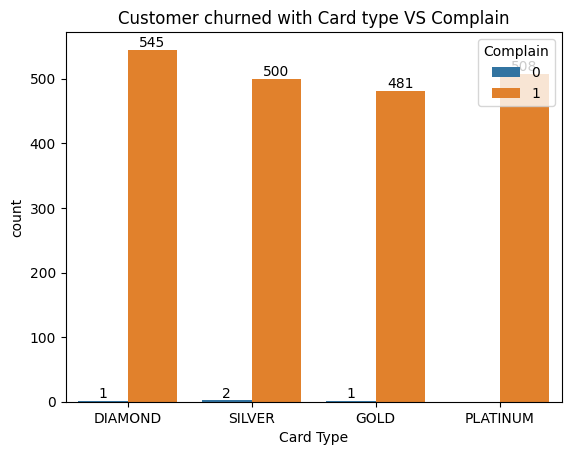

In [172]:
ax9 = sns.countplot(x = data[data["Exited"] == 1]["Card Type"],hue = data[data["Exited"] == 1]["Complain"])
for val in ax9.containers:
  ax9.bar_label(val)
plt.title("Customer churned with Card type VS Complain")
plt.show()


The graph above shows that customers who churned had registered complaints with their card type.





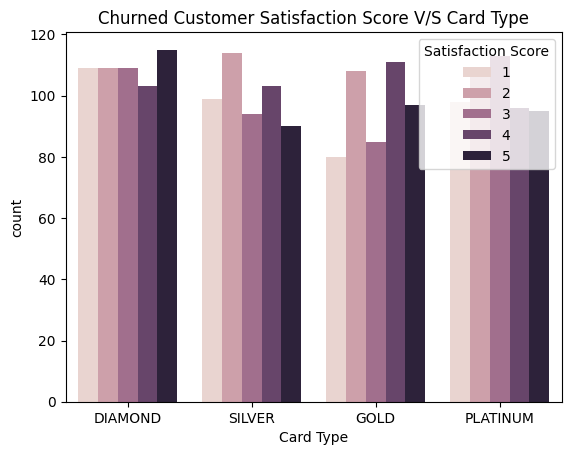

In [173]:
ax10 = sns.countplot(x = data[(data["Exited"] ==1) & (data["Complain"]==1)]["Card Type"],
                     hue = data[data["Exited"] == 1]["Satisfaction Score"])
plt.title("Churned Customer Satisfaction Score V/S Card Type")
plt.show()

The graph above illustrates the relationship between churned customers, their satisfaction score, and card type.

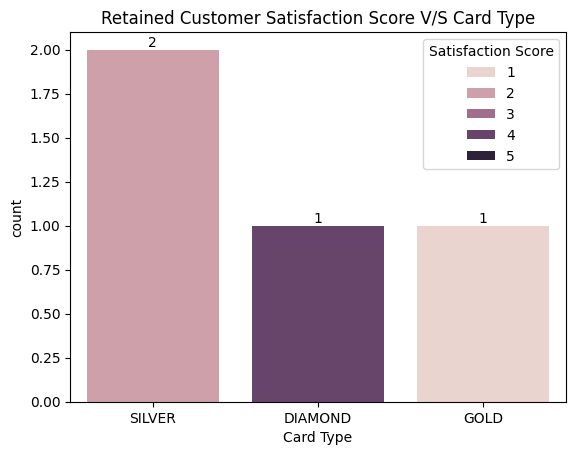

In [174]:
ax11 = sns.countplot(x = data[(data["Exited"]==1) & (data["Complain"]==0)]["Card Type"],
                     hue = data[data["Exited"]==1]["Satisfaction Score"])
for val in ax11.containers:
  ax11.bar_label(val)
plt.title("Retained Customer Satisfaction Score V/S Card Type")
plt.show()

The graph above illustrates the relationship between retained customers, their satisfaction score, and card type.
- Diamond card holder has high satisfaction score followed by silver and gold card type.

<Figure size 500x500 with 0 Axes>

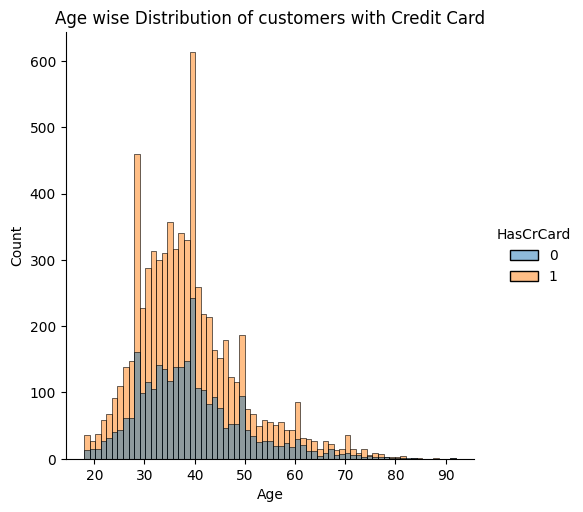

In [175]:
plt.figure(figsize=(5, 5))
sns.displot(data=data, x="Age", hue="HasCrCard")
plt.title("Age wise Distribution of customers with Credit Card")
plt.show()


<Figure size 500x500 with 0 Axes>

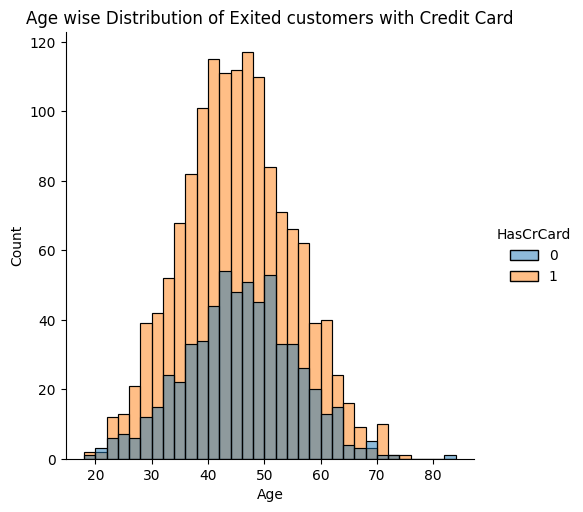

In [176]:
plt.figure(figsize=(5, 5))
sns.displot(data=data[data["Exited"] == 1], x="Age", hue="HasCrCard")
plt.title("Age wise Distribution of Exited customers with Credit Card")
plt.show()


<Figure size 500x500 with 0 Axes>

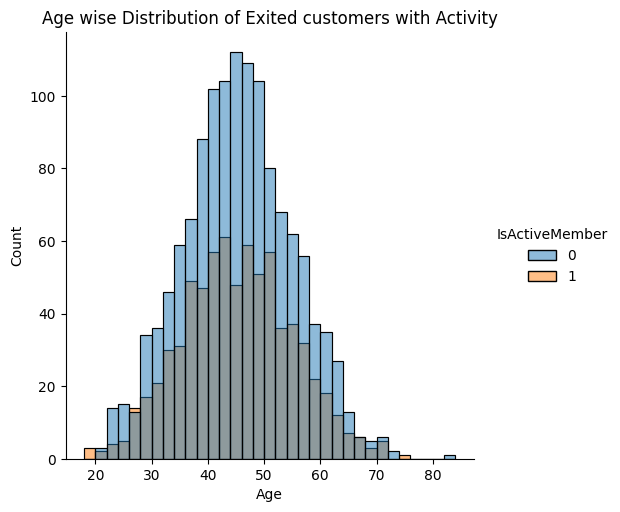

In [177]:
plt.figure(figsize=(5, 5))
sns.displot(data=data[data["Exited"] == 1], x="Age", hue="IsActiveMember")
plt.title("Age wise Distribution of Exited customers with Activity")
plt.show()

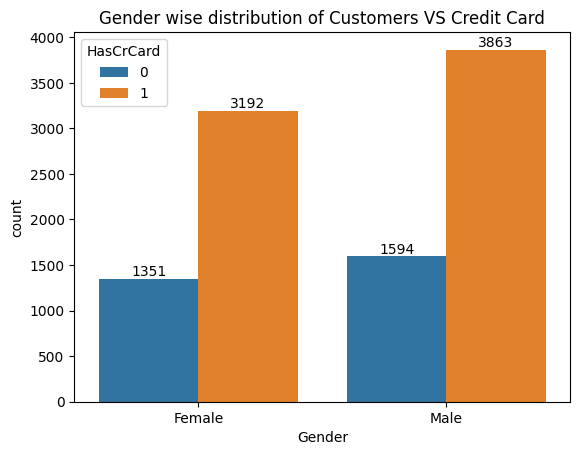

In [178]:
ax12 = sns.countplot(x = data["Gender"], hue = data["HasCrCard"])
for val in ax12.containers:
  ax12.bar_label(val)
plt.title("Gender wise distribution of Customers VS Credit Card")
plt.show()


The above graph indicates the Gender wise distribution of Customers who has Credit Card or not.

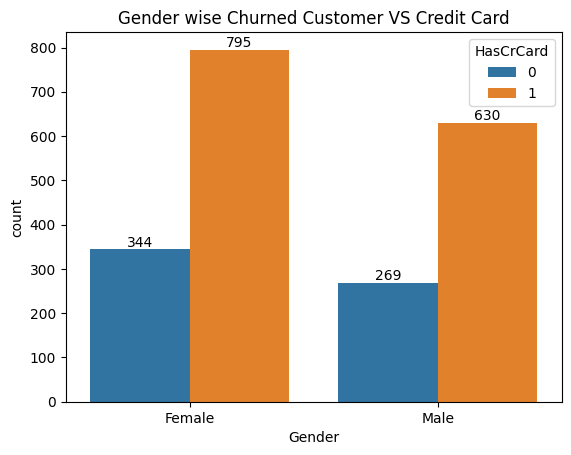

In [179]:
ax13 = sns.countplot(x="Gender", hue="HasCrCard", data=data[data["Exited"] == 1])
for val in ax13.containers:
  ax13.bar_label(val)
plt.title("Gender wise Churned Customer VS Credit Card")
plt.show()

The above graph indicates the Gender wise distribution of Churned Customers who has Credit Card or not.

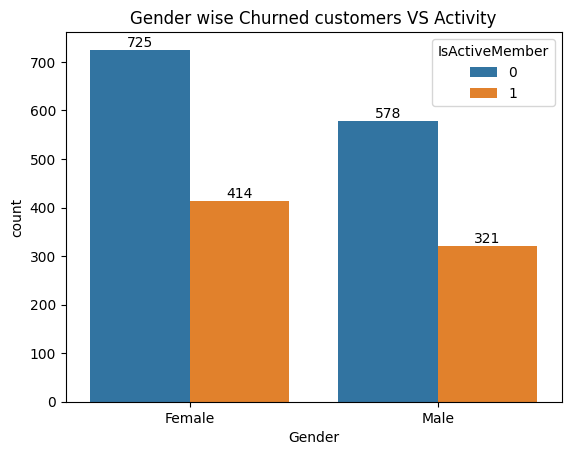

In [180]:
ax14 = sns.countplot(x = "Gender" , hue = "IsActiveMember", data = data[data["Exited"]==1])
for val in ax14.containers:
  ax14.bar_label(val)
plt.title("Gender wise Churned customers VS Activity")
plt.show()


##<font color = "Yellow"> **Observation & Recommendation:**
**The Customer churning are dependent on Variables like Credit Score ,Age and Geography, Balance Tenure has no relation with customer who churned.**

##<font color = "Yellow"> **Recommendations:**
- **Focus on Customer with Credit score between 600-700 as they are more likely to churn.**

- **Keep a guard rail check on the 30-40 year of age people as they are loyal customers ,the Age from 40 – 50 were the mostly who churned so incentivize them too so they not churned in future.**

- **Gender has an impact on churning so an incentives for both gender can benefits the customer.**

- **Focus on credit card service and bring innovation as people who left were most of who have credit card with them.**

- **Geography especially France as most customer centric and Balance should be considered for predicting the next possible churn.**

## <font color="Yellow">**Conclusion:**
**Customer leaving the bank makes a significant impact on firm reputation and leads to financial loss and in order to deal with this crisis a comprehensive data analysis needed for making an informed decision by decision makers.**